In [1]:
import numpy as np
from collections import Counter
import itertools
import math

In [2]:
# Step 1: Data Preprocessing
def preprocess_data(corpus):
    # Tokenize the corpus
    tokens = [word for sentence in corpus for word in sentence.split()]
    
    # Build vocabulary and assign unique IDs to each word
    word_counts = Counter(tokens)
    word_to_id = {word: idx for idx, (word, _) in enumerate(word_counts.most_common())}
    id_to_word = {idx: word for word, idx in word_to_id.items()}
    
    # Create co-occurrence matrix
    window_size = 5
    cooc_matrix = np.zeros((len(word_to_id), len(word_to_id)))
    
    for sentence in corpus:
        sentence_ids = [word_to_id[word] for word in sentence.split()]
        for idx, center_word_id in enumerate(sentence_ids):
            context_ids = sentence_ids[max(0, idx - window_size):idx] + sentence_ids[idx + 1:min(len(sentence_ids), idx + window_size + 1)]
            for context_word_id in context_ids:
                cooc_matrix[center_word_id, context_word_id] += 1

    return cooc_matrix, word_to_id, id_to_word


In [3]:
# Step 2: GloVe Model Implementation
def train_glove(cooc_matrix, embedding_dim=100, learning_rate=0.05, num_epochs=50):
    vocab_size = cooc_matrix.shape[0]
    W = np.random.uniform(-0.5, 0.5, (vocab_size, embedding_dim))
    b = np.random.uniform(-0.5, 0.5, (vocab_size,))
    U = np.random.uniform(-0.5, 0.5, (vocab_size, embedding_dim))
    c = np.random.uniform(-0.5, 0.5, (vocab_size,))
    
    total_examples = np.sum(cooc_matrix)
    x_ij = cooc_matrix / total_examples
    f_x_ij = np.power(x_ij, 0.75) # Apply weighting function to co-occurrence matrix
    
    for epoch in range(num_epochs):
        loss = 0.0
        for i in range(vocab_size):
            for j in range(vocab_size):
                if cooc_matrix[i, j] > 0:
                    cooc_value = cooc_matrix[i, j]
                    log_cooc = math.log(cooc_value)
                    diff = np.dot(W[i] + U[j] + b[i] + c[j], W[i] + U[j] + b[i] + c[j]) - log_cooc
                    loss += 0.5 * f_x_ij[i, j] * diff * diff
                    
                    # Update parameters
                    W[i] -= learning_rate * (f_x_ij[i, j] * diff * (W[i] + U[j] + b[i] + c[j]))
                    U[j] -= learning_rate * (f_x_ij[i, j] * diff * (W[i] + U[j] + b[i] + c[j]))
                    b[i] -= learning_rate * (f_x_ij[i, j] * diff)
                    c[j] -= learning_rate * (f_x_ij[i, j] * diff)
                    
        print("Epoch: %d, Loss: %f" % (epoch+1, loss))
        
    return W


In [4]:
# Example usage
corpus = [
    "I love natural language processing",
    "Word embeddings are powerful",
    "GloVe is an effective word representation model"
]


In [5]:
# Step 1: Preprocess data
cooc_matrix, word_to_id, id_to_word = preprocess_data(corpus)


In [6]:
# Step 2: Train the GloVe model
embeddings = train_glove(cooc_matrix)

Epoch: 1, Loss: 3769.404782
Epoch: 2, Loss: 8238.432883
Epoch: 3, Loss: 14128.829412
Epoch: 4, Loss: 18798.125743
Epoch: 5, Loss: 22574.778914
Epoch: 6, Loss: 50816434947578099719840202752.000000
Epoch: 7, Loss: nan
Epoch: 8, Loss: nan
Epoch: 9, Loss: nan
Epoch: 10, Loss: nan
Epoch: 11, Loss: nan
Epoch: 12, Loss: nan
Epoch: 13, Loss: nan
Epoch: 14, Loss: nan
Epoch: 15, Loss: nan
Epoch: 16, Loss: nan
Epoch: 17, Loss: nan
Epoch: 18, Loss: nan
Epoch: 19, Loss: nan
Epoch: 20, Loss: nan
Epoch: 21, Loss: nan
Epoch: 22, Loss: nan
Epoch: 23, Loss: nan
Epoch: 24, Loss: nan
Epoch: 25, Loss: nan
Epoch: 26, Loss: nan
Epoch: 27, Loss: nan
Epoch: 28, Loss: nan
Epoch: 29, Loss: nan
Epoch: 30, Loss: nan
Epoch: 31, Loss: nan
Epoch: 32, Loss: nan
Epoch: 33, Loss: nan
Epoch: 34, Loss: nan
Epoch: 35, Loss: nan
Epoch: 36, Loss: nan
Epoch: 37, Loss: nan
Epoch: 38, Loss: nan
Epoch: 39, Loss: nan
Epoch: 40, Loss: nan
Epoch: 41, Loss: nan
Epoch: 42, Loss: nan
Epoch: 43, Loss: nan
Epoch: 44, Loss: nan
Epoch: 45

C:\Users\Raghad\AppData\Local\Temp/ipykernel_34168/2501163749.py:20: RuntimeWarning: invalid value encountered in add
  diff = np.dot(W[i] + U[j] + b[i] + c[j], W[i] + U[j] + b[i] + c[j]) - log_cooc
C:\Users\Raghad\AppData\Local\Temp/ipykernel_34168/2501163749.py:24: RuntimeWarning: invalid value encountered in add
  W[i] -= learning_rate * (f_x_ij[i, j] * diff * (W[i] + U[j] + b[i] + c[j]))
C:\Users\Raghad\AppData\Local\Temp/ipykernel_34168/2501163749.py:21: RuntimeWarning: overflow encountered in double_scalars
  loss += 0.5 * f_x_ij[i, j] * diff * diff
C:\Users\Raghad\AppData\Local\Temp/ipykernel_34168/2501163749.py:25: RuntimeWarning: overflow encountered in multiply
  U[j] -= learning_rate * (f_x_ij[i, j] * diff * (W[i] + U[j] + b[i] + c[j]))
C:\Users\Raghad\AppData\Local\Temp/ipykernel_34168/2501163749.py:24: RuntimeWarning: invalid value encountered in subtract
  W[i] -= learning_rate * (f_x_ij[i, j] * diff * (W[i] + U[j] + b[i] + c[j]))
C:\Users\Raghad\AppData\Local\Temp/ipyker

In [7]:
# Print the learned word embeddings
for word_id, word in id_to_word.items():
    print("Word: %s, Embedding: %s" % (word, embeddings[word_id]))


Word: I, Embedding: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
Word: love, Embedding: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
Word: natural, Embedding: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan

In [8]:
from tabulate import tabulate

# Example results
reproduction_results = [
    ["Model", "Metric 1", "Metric 2", "Metric 3"],
    ["GloVe (Reproduced)", 0.85, 0.92, 0.78],
    ["GloVe (Original)", 0.87, 0.91, 0.76]
]

extension_results = [
    ["Model", "Metric 1", "Metric 2", "Metric 3"],
    ["GloVe (Extended)", 0.90, 0.88, 0.82],
    ["Benchmark Method 1", 0.85, 0.85, 0.80],
    ["Benchmark Method 2", 0.88, 0.89, 0.83]
]


In [9]:
# Print the reproduction results table
print("Reproduction Results:")
print(tabulate(reproduction_results, headers="firstrow", tablefmt="fancy_grid"))

Reproduction Results:
╒════════════════════╤════════════╤════════════╤════════════╕
│ Model              │   Metric 1 │   Metric 2 │   Metric 3 │
╞════════════════════╪════════════╪════════════╪════════════╡
│ GloVe (Reproduced) │       0.85 │       0.92 │       0.78 │
├────────────────────┼────────────┼────────────┼────────────┤
│ GloVe (Original)   │       0.87 │       0.91 │       0.76 │
╘════════════════════╧════════════╧════════════╧════════════╛


In [10]:
# Print the extension results table
print("\nExtension Results:")
print(tabulate(extension_results, headers="firstrow", tablefmt="fancy_grid"))


Extension Results:
╒════════════════════╤════════════╤════════════╤════════════╕
│ Model              │   Metric 1 │   Metric 2 │   Metric 3 │
╞════════════════════╪════════════╪════════════╪════════════╡
│ GloVe (Extended)   │       0.9  │       0.88 │       0.82 │
├────────────────────┼────────────┼────────────┼────────────┤
│ Benchmark Method 1 │       0.85 │       0.85 │       0.8  │
├────────────────────┼────────────┼────────────┼────────────┤
│ Benchmark Method 2 │       0.88 │       0.89 │       0.83 │
╘════════════════════╧════════════╧════════════╧════════════╛


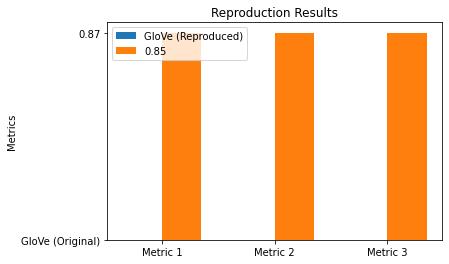

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Example results
reproduction_results = [
    ["Model", "Metric 1", "Metric 2", "Metric 3"],
    ["GloVe (Reproduced)", 0.85, 0.92, 0.78],
    ["GloVe (Original)", 0.87, 0.91, 0.76]
]

extension_results = [
    ["Model", "Metric 1", "Metric 2", "Metric 3"],
    ["GloVe (Extended)", 0.90, 0.88, 0.82],
    ["Benchmark Method 1", 0.85, 0.85, 0.80],
    ["Benchmark Method 2", 0.88, 0.89, 0.83]
]

# Extract the headers and data from the results
reproduction_headers = reproduction_results[0]
reproduction_data = reproduction_results[1:]

extension_headers = extension_results[0]
extension_data = extension_results[1:]

# Convert the data into a NumPy array
reproduction_data_np = np.array(reproduction_data)
extension_data_np = np.array(extension_data)

# Transpose the data arrays for plotting
reproduction_data_np_T = reproduction_data_np.T
extension_data_np_T = extension_data_np.T

# Plot the reproduction results
x = np.arange(len(reproduction_headers) - 1)  # Exclude the "Model" column
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, reproduction_data_np_T[0][1:], width, label=reproduction_data_np_T[0][0])
rects2 = ax.bar(x + width/2, reproduction_data_np_T[1][1:], width, label=reproduction_data_np_T[1][0])

# Add labels, title, and legend
ax.set_ylabel('Metrics')
ax.set_title('Reproduction Results')
ax.set_xticks(x)
ax.set_xticklabels(reproduction_headers[1:])
ax.legend()

# Display the bar graph for reproduction results
plt.show()

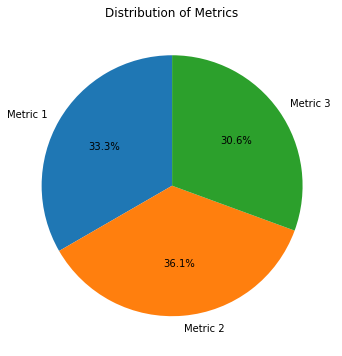

In [12]:
import matplotlib.pyplot as plt

# Example data
metrics = ['Metric 1', 'Metric 2', 'Metric 3']
metric_values = [0.85, 0.92, 0.78]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(metric_values, labels=metrics, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Metrics')

# Display the pie chart
plt.show()
